In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from keras.utils.vis_utils import plot_model


from keras.regularizers import L1L2

In [77]:
nd1=pd.read_csv("alldata5.csv")
nd1=nd1.append(pd.read_csv("alldata10.csv"))
nd1=nd1.append(pd.read_csv("alldata14.csv"))
nd1=nd1.sort_values("Match_id").reset_index(drop=True)

data3=pd.read_csv("data3.csv")
data4=pd.read_csv("data4.csv")
data3=data3.append(data4)
data3=data3.sort_values("Match_id").reset_index(drop=True)

X=nd1.drop(columns=["Result","Match_id"])
Y=nd1["Result"]
Y=Y.replace("Radiant",0)
Y=Y.replace("Dire",1)
X2=data3.drop(columns=["Result","Match_id"])
Y2=data3["Result"]
Y2=Y2.replace("Radiant",0)
Y2=Y2.replace("Dire",1)

In [78]:
data3

,Match_id,Player_1_hero_id,Player_2_hero_id,Player_3_hero_id,Player_4_hero_id,Player_5_hero_id,Player_6_hero_id,Player_7_hero_id,Player_8_hero_id,Player_9_hero_id,Player_10_hero_id,Result
0,6268246973,30,28,72,91,11,3,68,17,52,42,Dire
1,6268247018,108,74,68,1,128,104,16,90,114,123,Dire
2,6268247184,25,18,38,136,71,50,74,103,47,54,Dire
3,6268247443,68,136,112,3,1,81,119,32,135,17,Dire
4,6268247492,81,84,128,48,39,111,53,73,123,42,Dire
...,...,...,...,...,...,...,...,...,...,...,...,...
28661,6276008172,53,11,20,93,100,62,26,99,1,106,Radiant
28662,6276010381,7,11,67,72,61,126,76,85,121,10,Dire
28663,6276011086,104,44,58,84,86,11,64,66,110,43,Dire
28664,6276017969,107,84,14,63,54,108,93,128,85,74,Radiant


In [79]:
X=X[["Player_1_item1","Player_1_item2","Player_1_item3","Player_1_item4","Player_1_item5","Player_1_backpack1","Player_1_backpack2","Player_1_backpack3","Player_2_item1","Player_2_item2","Player_2_item3","Player_2_item4","Player_2_item5","Player_2_backpack1","Player_2_backpack2","Player_2_backpack3","Player_3_item1","Player_3_item2","Player_3_item3","Player_3_item4","Player_3_item5","Player_3_backpack1","Player_3_backpack2","Player_3_backpack3","Player_4_item1","Player_4_item2","Player_4_item3","Player_4_item4","Player_4_item5","Player_4_backpack1","Player_4_backpack2","Player_4_backpack3","Player_5_item1","Player_5_item2","Player_5_item3","Player_5_item4","Player_5_item5","Player_5_backpack1","Player_5_backpack2","Player_5_backpack3","Player_6_item1","Player_6_item2","Player_6_item3","Player_6_item4","Player_6_item5","Player_6_backpack1","Player_6_backpack2","Player_6_backpack3","Player_7_item1","Player_7_item2","Player_7_item3","Player_7_item4","Player_7_item5","Player_7_backpack1","Player_7_backpack2","Player_7_backpack3","Player_8_item1","Player_8_item2","Player_8_item3","Player_8_item4","Player_8_item5","Player_8_backpack1","Player_8_backpack2","Player_8_backpack3","Player_9_item1","Player_9_item2","Player_9_item3","Player_9_item4","Player_9_item5","Player_9_backpack1","Player_9_backpack2","Player_9_backpack3","Player_10_item1","Player_10_item2","Player_10_item3","Player_10_item4","Player_10_item5","Player_10_backpack1","Player_10_backpack2","Player_10_backpack3"]]

In [80]:
l1=[]
l2=[]

for i in X2.itertuples():
  l1=[]

  for j in range(1,137):
    if j in i[1:6]:
      l1.append(1)
    else:
      l1.append(0)
  for j in range(1,137):
      if j in i[6:11]:
        l1.append(1)
      else:
        l1.append(0)  

  
  l2.append(l1)
  

Xoh=pd.DataFrame(l2)
Xoh

,0,1,2,3,4,5,6,7,8,9,...,262,263,264,265,266,267,268,269,270,271
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28661,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28662,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28663,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28664,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [81]:
X3=pd.concat([X,Xoh[:26000]],axis=1)

X3

,Player_1_item1,Player_1_item2,Player_1_item3,Player_1_item4,Player_1_item5,Player_1_backpack1,Player_1_backpack2,Player_1_backpack3,Player_2_item1,Player_2_item2,...,262,263,264,265,266,267,268,269,270,271
0,102,604,116,256,48,38,677,0,156,249,...,0,0,0,0,0,0,0,0,0,0
1,180,36,0,60,0,0,0,0,218,36,...,0,0,0,0,0,0,0,0,0,0
2,11,36,180,131,242,38,0,0,98,65,...,0,0,0,0,0,0,0,0,0,0
3,48,249,16,41,77,0,0,0,13,172,...,0,0,0,0,0,0,0,0,1,0
4,102,0,40,28,28,0,0,0,216,151,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25995,34,116,135,0,108,0,0,0,214,48,...,0,0,0,0,0,0,0,0,0,0
25996,1,50,151,116,36,0,0,0,0,1466,...,0,0,0,0,0,0,0,0,0,0
25997,1,229,40,36,214,0,0,0,123,100,...,0,0,0,0,0,0,0,0,0,1
25998,267,36,108,232,214,0,0,0,125,34,...,0,0,1,0,0,0,0,0,0,0


In [82]:
xtr,xtest,ytr,ytest= train_test_split(Xoh,Y2,test_size=0.2, random_state=1)
xtr=xtr.reset_index(drop="True")
ytr=ytr.reset_index(drop="True")
xtest=xtest.reset_index(drop="True")
ytest=ytest.reset_index(drop="True")

In [83]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(8,input_dim=xtr.shape[1],activation='tanh'),
    tf.keras.layers.Dropout(0.7),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',loss='binary_crossentropy', metrics=["accuracy"])

model.summary

history=model.fit(xtr,ytr,batch_size=1000,epochs=100,validation_data=(xtest,ytest))

Epoch 1/100
23/23 [==============================] - 0s 18ms/step - loss: 0.7484 - accuracy: 0.5058 - val_loss: 0.6969 - val_accuracy: 0.5373
Epoch 2/100
23/23 [==============================] - 0s 7ms/step - loss: 0.7236 - accuracy: 0.5310 - val_loss: 0.6892 - val_accuracy: 0.5494
Epoch 3/100
23/23 [==============================] - 0s 7ms/step - loss: 0.7132 - accuracy: 0.5346 - val_loss: 0.6838 - val_accuracy: 0.5595
Epoch 4/100
23/23 [==============================] - 0s 8ms/step - loss: 0.7080 - accuracy: 0.5400 - val_loss: 0.6796 - val_accuracy: 0.5698
Epoch 5/100
23/23 [==============================] - 0s 7ms/step - loss: 0.7005 - accuracy: 0.5509 - val_loss: 0.6767 - val_accuracy: 0.5746
Epoch 6/100
23/23 [==============================] - 0s 7ms/step - loss: 0.6937 - accuracy: 0.5570 - val_loss: 0.6746 - val_accuracy: 0.5792
Epoch 7/100
23/23 [==============================] - 0s 7ms/step - loss: 0.6911 - accuracy: 0.5508 - val_loss: 0.6732 - val_accuracy: 0.5848
Epoch 8/100


In [84]:
# model.load_weights(var)
testloss,testacc=model.evaluate(xtest,ytest,verbose=0)
testacc

0.588594377040863

In [85]:
np.argmax(history.history['accuracy'])

49

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


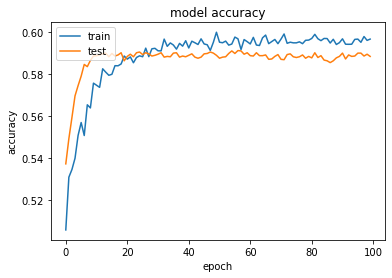

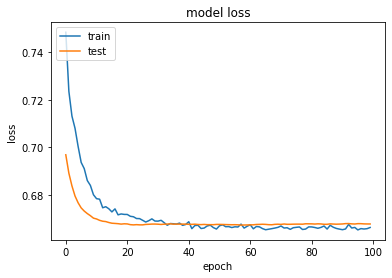

In [86]:
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [87]:
xtr,xtest,ytr,ytest= train_test_split(X3,Y,test_size=0.2, random_state=1)
xtr=xtr.reset_index(drop="True")
ytr=ytr.reset_index(drop="True")
xtest=xtest.reset_index(drop="True")
ytest=ytest.reset_index(drop="True")

In [88]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(8,input_dim=xtr.shape[1],activation='tanh'),
    tf.keras.layers.Dropout(0.7),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',loss='binary_crossentropy', metrics=["accuracy"])

model.summary

history=model.fit(xtr,ytr,batch_size=1000,epochs=100,validation_data=(xtest,ytest))

Epoch 1/100
21/21 [==============================] - 1s 51ms/step - loss: 0.8951 - accuracy: 0.5189 - val_loss: 0.7153 - val_accuracy: 0.5494
Epoch 2/100
21/21 [==============================] - 0s 12ms/step - loss: 0.8643 - accuracy: 0.5215 - val_loss: 0.6995 - val_accuracy: 0.5625
Epoch 3/100
21/21 [==============================] - 0s 12ms/step - loss: 0.8466 - accuracy: 0.5190 - val_loss: 0.6898 - val_accuracy: 0.5688
Epoch 4/100
21/21 [==============================] - 0s 10ms/step - loss: 0.8281 - accuracy: 0.5294 - val_loss: 0.6812 - val_accuracy: 0.5769
Epoch 5/100
21/21 [==============================] - 0s 12ms/step - loss: 0.8118 - accuracy: 0.5242 - val_loss: 0.6781 - val_accuracy: 0.5848
Epoch 6/100
21/21 [==============================] - 0s 11ms/step - loss: 0.7906 - accuracy: 0.5325 - val_loss: 0.6740 - val_accuracy: 0.5842
Epoch 7/100
21/21 [==============================] - 0s 11ms/step - loss: 0.7810 - accuracy: 0.5353 - val_loss: 0.6735 - val_accuracy: 0.5875
Epoch 

In [89]:
testloss,testacc=model.evaluate(xtest,ytest,verbose=0)
testacc

0.7184615135192871

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


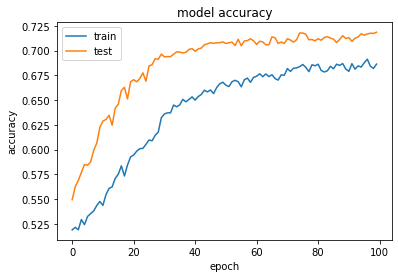

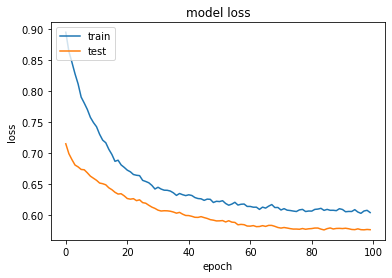

In [90]:
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [91]:
def prob(X):
  pred=model.predict(X)[0][0]

  if(pred<0.5):
    a="Radiant has "+ str( np.round(100-pred*100,2 )) +"% chance of winning."
    print(a)
  else:
    a="Dire has "+ str(pred*100) +"% chance of winning."
    print(a)
    
  return a

In [92]:
prob(xtest[70:71])

Radiant has 65.94% chance of winning.


'Radiant has 65.94% chance of winning.'

In [93]:
# !pip install ann_visualizer
# !pip install graphviz
# from ann_visualizer.visualize import ann_viz;

# ann_viz(model, title="nnarch",view=True,filename="asdf.png")



In [94]:
# from sklearn.datasets import make_classification
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import f_classif

# aa=xtr
# bb=ytr
# fs = SelectKBest(score_func=f_classif, k=50)

# # apply feature selection
# X_selected = fs.fit(aa, bb)
# cols = fs.get_support(indices=True)
# X_selected = aa.iloc[:,cols]
# X_selected

In [95]:
# team2=xtest[xtest.columns[136:]]
# team1=xtest[xtest.columns[:136]]
# newxtest=pd.concat([team2,team1],axis=1)
# print(newxtest)

# team2x=xtr[xtr.columns[136:]]
# team1x=xtr[xtr.columns[:136]]
# newxtr=pd.concat([team2x,team1x],axis=1)
# newxtr


In [96]:
# from sklearn.preprocessing import OneHotEncoder
# ohe = OneHotEncoder()
# ohe.fit(X.drop(columns="match_id"))
# X_train_enc = ohe.transform(xtr)
# X_test_enc = ohe.transform(xtest)

In [97]:
# nd1=pd.read_csv("NN_data_1.csv")

# nd1=nd1.append(pd.read_csv("NN_data_2.csv"))
# nd1=nd1.append(pd.read_csv("NN_data_3.csv")).reset_index(drop=True)
# nd1=nd1.append(pd.read_csv("NN_data_4.csv")).reset_index(drop=True)
# nd1=nd1.append(pd.read_csv("NN_data_5.csv")).reset_index(drop=True)
# nd1=nd1.append(pd.read_csv("NN_data_6.csv")).reset_index(drop=True)
# nd1=nd1.append(pd.read_csv("NN_data_7.csv")).reset_index(drop=True)
# nd1=nd1.append(pd.read_csv("NN_data_8.csv")).reset_index(drop=True)
# nd1=nd1.append(pd.read_csv("NN_data_9.csv")).reset_index(drop=True)
# nd1=nd1.append(pd.read_csv("NN_data_10.csv")).reset_index(drop=True)
# nd1=nd1.append(pd.read_csv("NN_data_11.csv")).reset_index(drop=True)
# nd1=nd1.append(pd.read_csv("NN_data_12.csv")).reset_index(drop=True)
# nd1=nd1.append(pd.read_csv("NN_data_13.csv")).reset_index(drop=True)
# nd1=nd1.append(pd.read_csv("NN_data_14.csv")).reset_index(drop=True)
# nd1=nd1.append(pd.read_csv("NN_data_15.csv")).reset_index(drop=True)
# nd1=nd1.append(pd.read_csv("NN_data_16.csv")).reset_index(drop=True)
# nd1=nd1.append(pd.read_csv("NN_data_17.csv")).reset_index(drop=True)
# nd1=nd1.append(pd.read_csv("NN_data_18.csv")).reset_index(drop=True)
# nd1=nd1.append(pd.read_csv("NN_data_19.csv")).reset_index(drop=True)
# nd1=nd1.append(pd.read_csv("NN_data_20.csv")).reset_index(drop=True)
